# Set Up

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
import numpy as np
from matplotlib.patches import FancyArrowPatch

from pylab import imread, imshow
from IPython.display import Image, display

%matplotlib inline

In [2]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._xyz = (x,y,z)
        self._dxdydz = (dx,dy,dz)

    def draw(self, renderer):
        x1,y1,z1 = self._xyz
        dx,dy,dz = self._dxdydz
        x2,y2,z2 = (x1+dx,y1+dy,z1+dz)

        xs, ys, zs = proj_transform((x1,x2),(y1,y2),(z1,z2), renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        super().draw(renderer)

In [3]:
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)

setattr(Axes3D,'arrow3D',_arrow3D)

# Visualizing Span

## Define Three vector

In [4]:
v1 = np.array([1, 0, 1])
v2 = np.array([0, 1, 1])
v3 = np.array([1, 1, 0])

## Vector in span{v1}

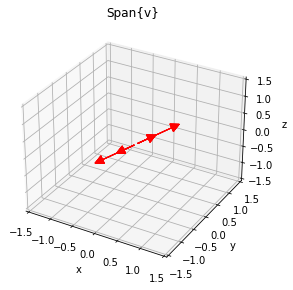

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)

alpha = [-1, -0.5, 0, 0.5, 1]
beta = [-1, -0.5, 0, 0.5, 1]

for i in alpha:
    for j in beta:
        ax.arrow3D(0,0,0,
           v1[0]*i, v1[1]*i, v1[2]*i,
           mutation_scale=20, arrowstyle='-|>', color='red')

ax.set_title('Span{v}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.tight_layout()

## Vector span{v1, v2}

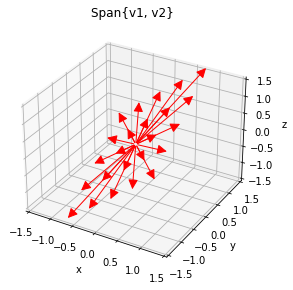

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-1.5,1.5)
ax.set_ylim(-1.5,1.5)
ax.set_zlim(-1.5,1.5)

# xx, yy = np.meshgrid(range(3), range(3))
# z = 
# ax.plot_surface(xx, yy, z, alpha=0.2)


alpha = [-1, -0.5, 0, 0.5, 1]
beta = [-1, -0.5, 0, 0.5, 1]

for i in alpha:
    for j in beta:
        ax.arrow3D(0,0,0,
           v1[0]*i+v2[0]*j,v1[1]*i+v2[1]*j,v1[2]*i+v2[2]*j,
           mutation_scale=20, arrowstyle='-|>', color='red')
ax.set_title('Span{v1, v2}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.tight_layout()

# Vector Span in {v1, v2, v3}

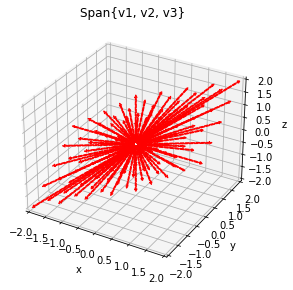

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

alpha = [-1, -0.5, 0, 0.5, 1]
beta = [-1, -0.5, 0, 0.5, 1]
gamma = [-1, -0.5, 0, 0.5, 1]

for i in alpha:
    for j in beta:
        for k in gamma:
            ax.arrow3D(0,0,0,
               v1[0]*i+v2[0]*j+v3[0]*k,v1[1]*i+v2[1]*j+v3[1]*k,v1[2]*i+v2[2]*j+v3[2]*k,
               mutation_scale=5, linestyle='dashed', color='red')
ax.set_title('Span{v1, v2, v3}')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.tight_layout()